In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
topics_df = pd.read_csv('../data/topics.csv')
opinions_df = pd.read_csv('../data/opinions.csv')
conclusions_df = pd.read_csv('../data/conclusions.csv')

print(f"Topics: {len(topics_df)} satır")
print(f"Opinions: {len(opinions_df)} satır")
print(f"Conclusions: {len(conclusions_df)} satır")

Veri yüklendi!
Topics: 4024 satır
Opinions: 27099 satır
Conclusions: 3351 satır


In [3]:
print(topics_df['type'].value_counts())
print(opinions_df['type'].value_counts())
print(conclusions_df['type'].value_counts())

type
Position    4024
Name: count, dtype: int64
type
Evidence        12105
Claim           11977
Counterclaim     1773
Rebuttal         1244
Name: count, dtype: int64
type
Concluding Statement    3351
Name: count, dtype: int64


In [ ]:
print("\n" + "="*60)
print("TOPICS DataFrame Info")
print("="*60)
print(topics_df.info())
print("\nİlk 3 satır:")
print(topics_df.head(3))

print(f"\n Null değerler: {topics_df.isnull().sum().sum()}")
print(f" Duplicate ID'ler: {topics_df['id'].duplicated().sum()}")

print("\n" + "="*60)
print(" OPINIONS DataFrame Info")
print("="*60)
print(opinions_df.info())
print("\nİlk 3 satır:")
print(opinions_df.head(3))

print(f"\n Null değerler:")
print(opinions_df.isnull().sum())
print(f"\n Unique topic_id count: {opinions_df['topic_id'].nunique()}")
print(f" Position types: {opinions_df['effectiveness'].unique()}")

print("\n" + "="*60)
print(" CONCLUSIONS DataFrame Info")
print("="*60)
print(conclusions_df.info())
print("\nİlk 3 satır:")
print(conclusions_df.head(3))


TOPICS DataFrame Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             4024 non-null   object
 1   topic_id       4024 non-null   object
 2   text           4024 non-null   object
 3   type           4024 non-null   object
 4   effectiveness  4024 non-null   object
dtypes: object(5)
memory usage: 157.3+ KB
None

İlk 3 satır:
             id      topic_id  \
0  9704a709b505  007ACE74B050   
1  de347c859ab6  00944C693682   
2  c20937683442  00BD97EA4041   

                                                text      type effectiveness  
0  On my perspective, I think that the face is a ...  Position      Adequate  
1  With so many things in this world that few peo...  Position     Effective  
2  No because, why should a computer know how you...  Position      Adequate  

 Null değerler: 0
 Duplicate ID'ler: 0

 OPINIONS DataFrame

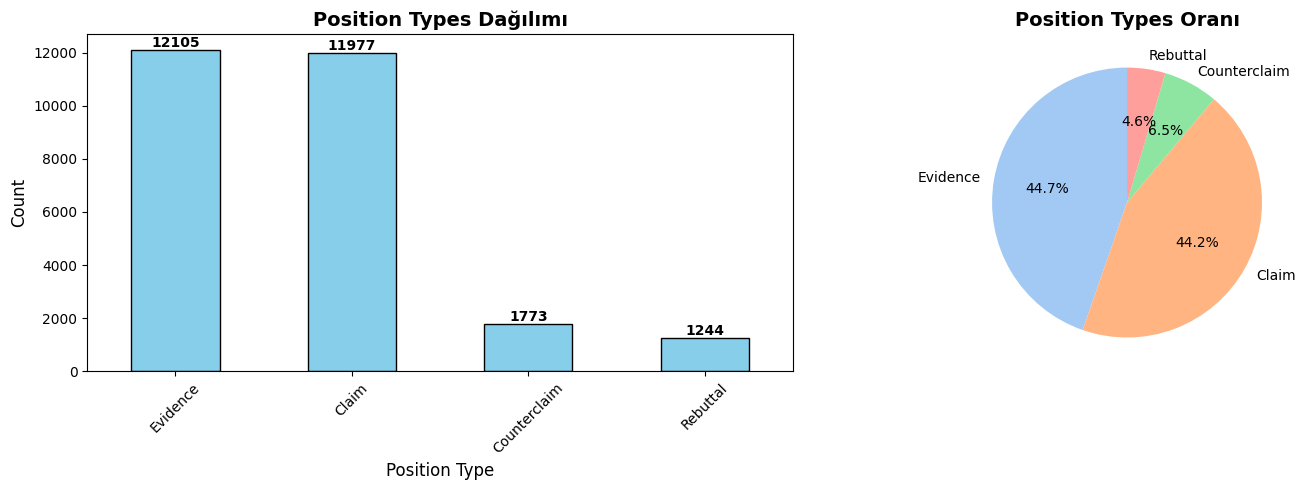


📊 Position Distribution:
type
Evidence        12105
Claim           11977
Counterclaim     1773
Rebuttal         1244
Name: count, dtype: int64

⚠️ Class Imbalance Ratio: 9.73x


In [ ]:
position_counts = opinions_df['type'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

position_counts.plot(kind='bar', ax=axes[0], color='skyblue', edgecolor='black')
axes[0].set_title('Types Dağılımı', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Type', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)

for i, v in enumerate(position_counts.values):
    axes[0].text(i, v + 10, str(v), ha='center', va='bottom', fontweight='bold')

axes[1].pie(position_counts.values, labels=position_counts.index, autopct='%1.1f%%',
            startangle=90, colors=sns.color_palette('pastel'))
axes[1].set_title('Position Types Oranı', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('../docs/position_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n📊 Position Distribution:")
print(position_counts)
print(f"\n⚠️ Class Imbalance Ratio: {position_counts.max() / position_counts.min():.2f}x")


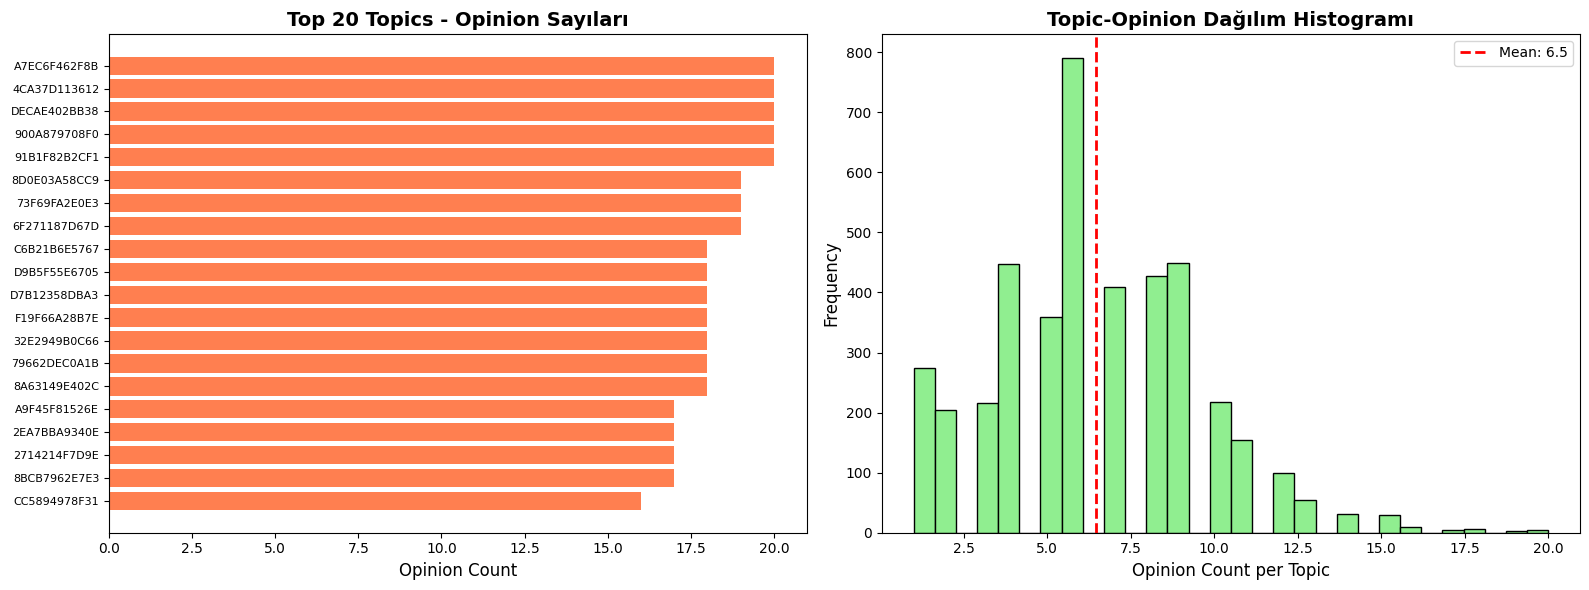


📊 Opinion per Topic Statistics:
count    4189.000000
mean        6.469086
std         3.136547
min         1.000000
25%         4.000000
50%         6.000000
75%         9.000000
max        20.000000
Name: opinion_count, dtype: float64


In [ ]:
opinions_per_topic = opinions_df.groupby('topic_id').size().reset_index(name='opinion_count')
opinions_per_topic = opinions_per_topic.sort_values('opinion_count', ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Bar plot - Top 20 topics
top_20 = opinions_per_topic.head(20)
axes[0].barh(range(len(top_20)), top_20['opinion_count'], color='coral')
axes[0].set_yticks(range(len(top_20)))
axes[0].set_yticklabels(top_20['topic_id'], fontsize=8)
axes[0].set_xlabel('Opinion Count', fontsize=12)
axes[0].set_title('Top 20 Topics - Opinion Sayıları', fontsize=14, fontweight='bold')
axes[0].invert_yaxis()

# Distribution histogram
axes[1].hist(opinions_per_topic['opinion_count'], bins=30, color='lightgreen', edgecolor='black')
axes[1].set_xlabel('Opinion Count per Topic', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].set_title('Topic-Opinion Dağılım Histogramı', fontsize=14, fontweight='bold')
axes[1].axvline(opinions_per_topic['opinion_count'].mean(), color='red', 
                linestyle='--', linewidth=2, label=f'Mean: {opinions_per_topic["opinion_count"].mean():.1f}')
axes[1].legend()

plt.tight_layout()
plt.savefig('../docs/topic_opinion_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n📊 Opinion per Topic Statistics:")
print(opinions_per_topic['opinion_count'].describe())

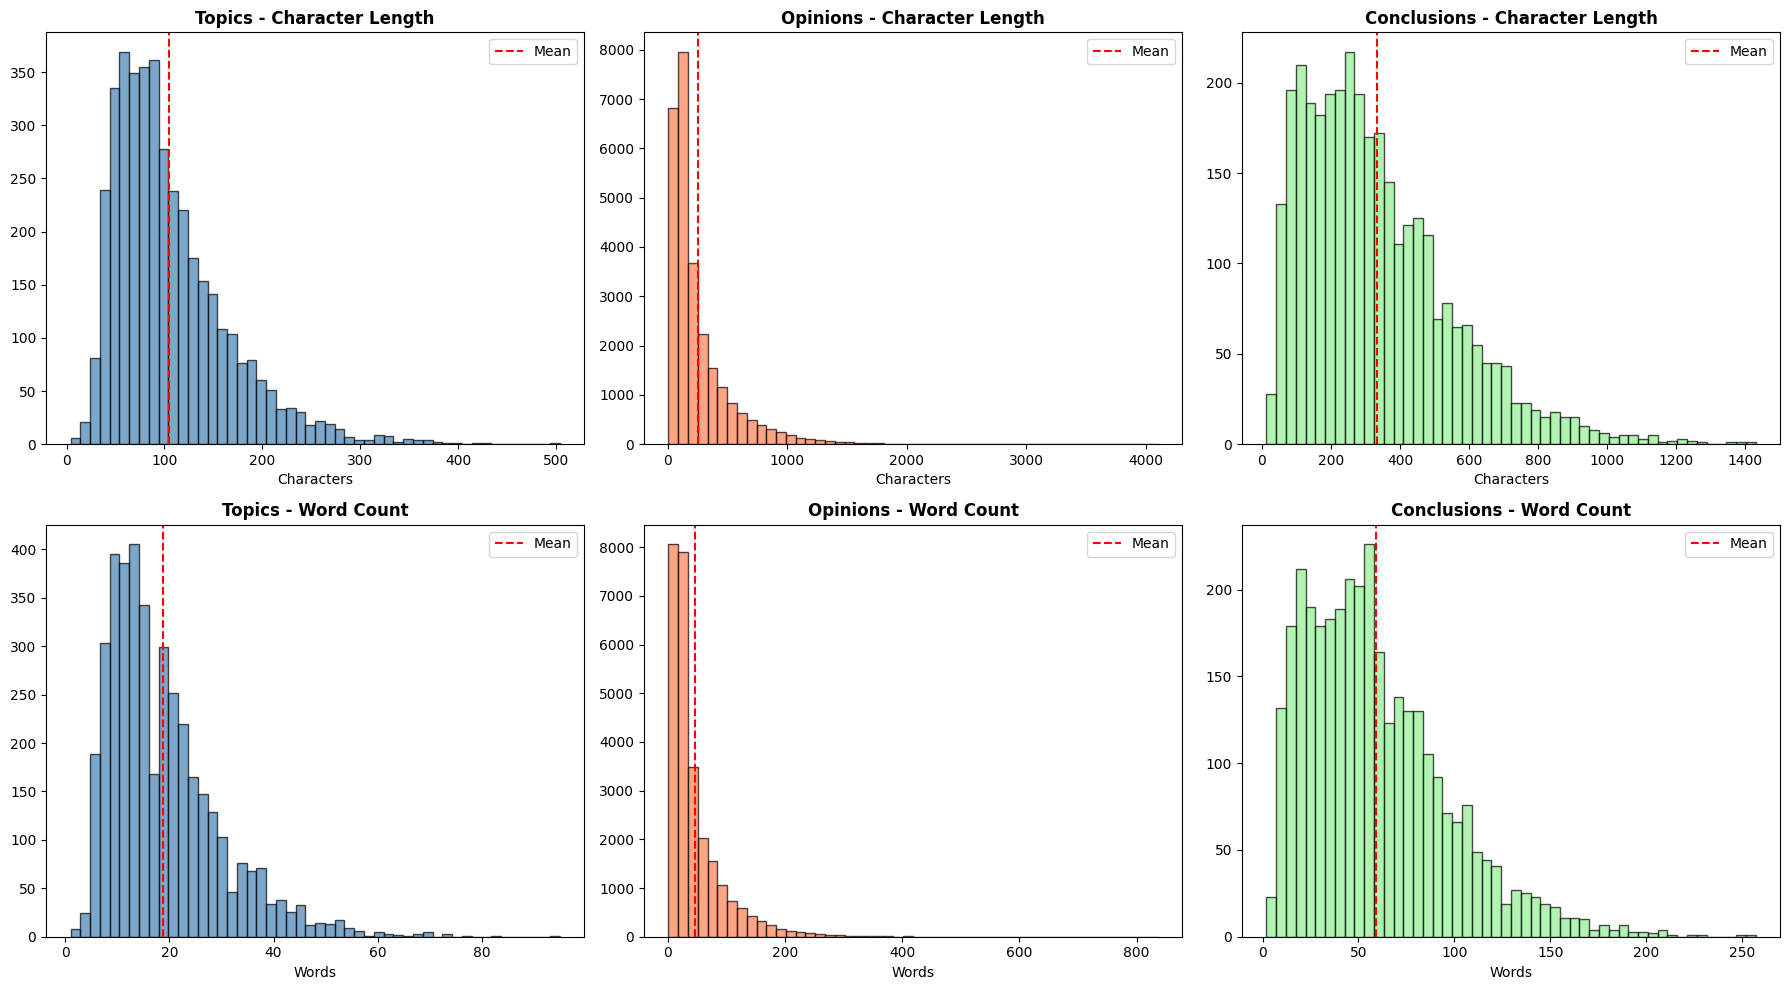


📏 Text Length Statistics:

Topics:
       text_length   word_count
count  4024.000000  4024.000000
mean    105.061630    18.794980
std      59.064824    10.865021
min       4.000000     1.000000
25%      62.000000    11.000000
50%      90.000000    16.000000
75%     133.000000    24.000000
max     504.000000    95.000000

Opinions:
        text_length    word_count
count  27099.000000  27099.000000
mean     255.995978     45.964537
std      281.337246     50.103153
min        6.000000      1.000000
25%       87.000000     16.000000
50%      153.000000     28.000000
75%      316.000000     57.000000
max     4099.000000    836.000000

Conclusions:
       text_length   word_count
count  3351.000000  3351.000000
mean    332.267084    59.125634
std     215.983092    37.416862
min      13.000000     2.000000
25%     170.000000    31.000000
50%     287.000000    52.000000
75%     451.000000    80.000000
max    1430.000000   257.000000


In [ ]:
# text lengths
topics_df['text_length'] = topics_df['text'].str.len()
topics_df['word_count'] = topics_df['text'].str.split().str.len()

opinions_df['text_length'] = opinions_df['text'].str.len()
opinions_df['word_count'] = opinions_df['text'].str.split().str.len()

conclusions_df['text_length'] = conclusions_df['text'].str.len()
conclusions_df['word_count'] = conclusions_df['text'].str.split().str.len()

# Visualization
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Topics
axes[0, 0].hist(topics_df['text_length'], bins=50, color='steelblue', edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Topics - Character Length', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Characters')
axes[0, 0].axvline(topics_df['text_length'].mean(), color='red', linestyle='--', label='Mean')
axes[0, 0].legend()

axes[1, 0].hist(topics_df['word_count'], bins=50, color='steelblue', edgecolor='black', alpha=0.7)
axes[1, 0].set_title('Topics - Word Count', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Words')
axes[1, 0].axvline(topics_df['word_count'].mean(), color='red', linestyle='--', label='Mean')
axes[1, 0].legend()

# Opinions
axes[0, 1].hist(opinions_df['text_length'], bins=50, color='coral', edgecolor='black', alpha=0.7)
axes[0, 1].set_title('Opinions - Character Length', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Characters')
axes[0, 1].axvline(opinions_df['text_length'].mean(), color='red', linestyle='--', label='Mean')
axes[0, 1].legend()

axes[1, 1].hist(opinions_df['word_count'], bins=50, color='coral', edgecolor='black', alpha=0.7)
axes[1, 1].set_title('Opinions - Word Count', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Words')
axes[1, 1].axvline(opinions_df['word_count'].mean(), color='red', linestyle='--', label='Mean')
axes[1, 1].legend()

# Conclusions
axes[0, 2].hist(conclusions_df['text_length'], bins=50, color='lightgreen', edgecolor='black', alpha=0.7)
axes[0, 2].set_title('Conclusions - Character Length', fontsize=12, fontweight='bold')
axes[0, 2].set_xlabel('Characters')
axes[0, 2].axvline(conclusions_df['text_length'].mean(), color='red', linestyle='--', label='Mean')
axes[0, 2].legend()

axes[1, 2].hist(conclusions_df['word_count'], bins=50, color='lightgreen', edgecolor='black', alpha=0.7)
axes[1, 2].set_title('Conclusions - Word Count', fontsize=12, fontweight='bold')
axes[1, 2].set_xlabel('Words')
axes[1, 2].axvline(conclusions_df['word_count'].mean(), color='red', linestyle='--', label='Mean')
axes[1, 2].legend()

plt.tight_layout()
plt.savefig('../docs/text_length_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# Summary
print("\n📏 Text Length Statistics:")
print("\nTopics:")
print(topics_df[['text_length', 'word_count']].describe())
print("\nOpinions:")
print(opinions_df[['text_length', 'word_count']].describe())
print("\nConclusions:")
print(conclusions_df[['text_length', 'word_count']].describe())

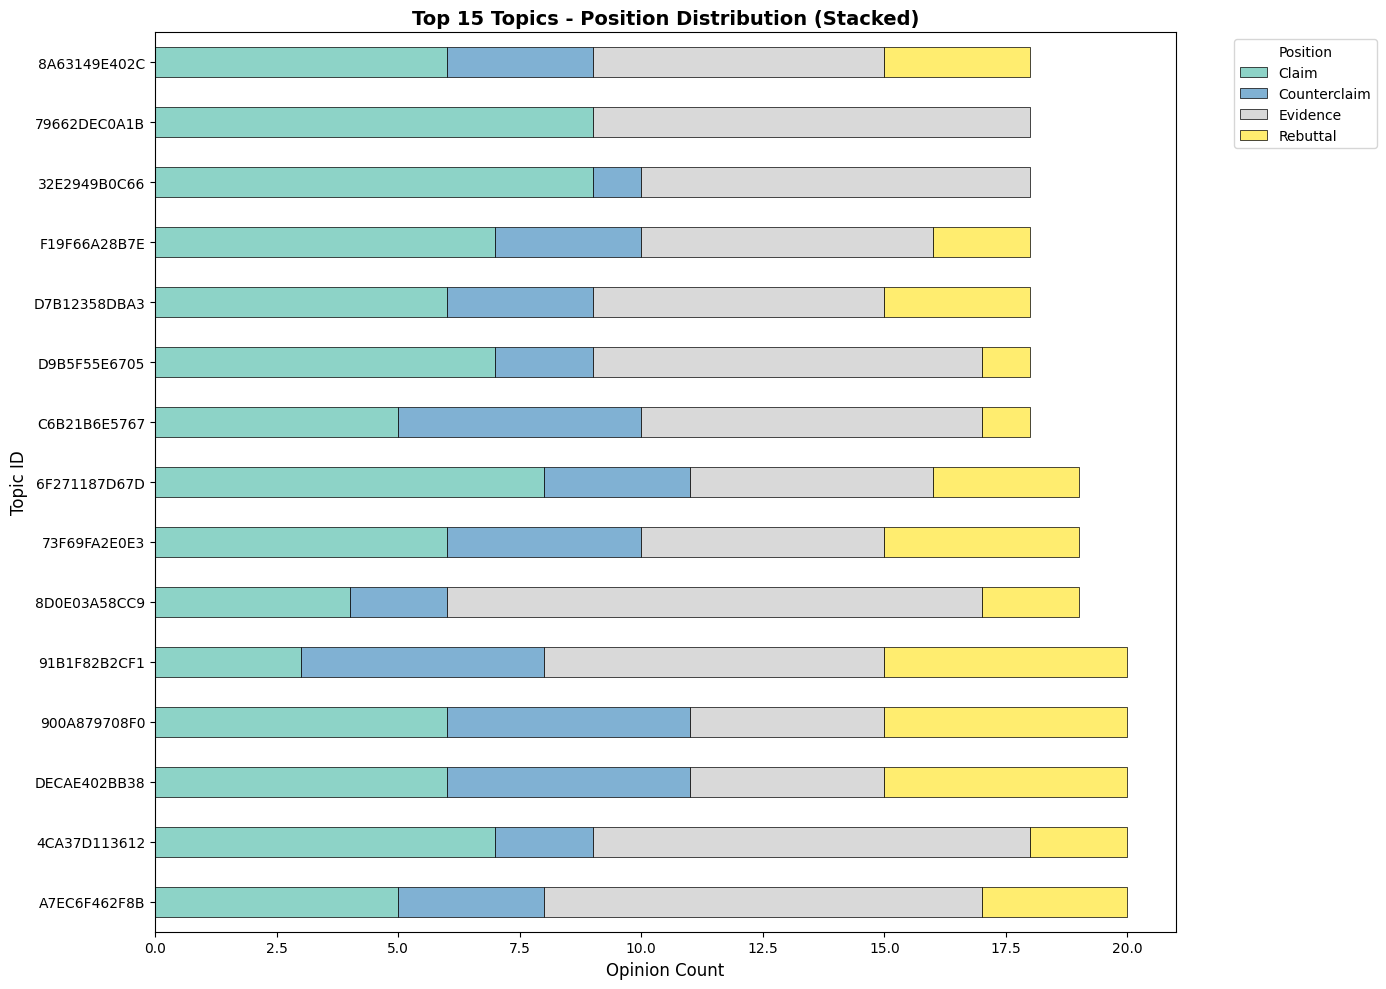

In [ ]:
position_by_topic = opinions_df.groupby(['topic_id', 'type']).size().unstack(fill_value=0)

# Top 15 topics by total opinions
top_topics = opinions_per_topic.head(15)['topic_id'].tolist()
position_by_topic_top = position_by_topic.loc[top_topics]

# Stacked bar
ax = position_by_topic_top.plot(kind='barh', stacked=True, figsize=(14, 10), 
                                 colormap='Set3', edgecolor='black', linewidth=0.5)
ax.set_title('Top 15 Topics - Position Distribution (Stacked)', fontsize=14, fontweight='bold')
ax.set_xlabel('Opinion Count', fontsize=12)
ax.set_ylabel('Topic ID', fontsize=12)
ax.legend(title='Position', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('../docs/position_by_topic.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
print("\n" + "="*60)
print("🔍 DATA QUALITY CHECKS")
print("="*60)

# Missing values
print("\n1. Missing Values:")
print(f"   Topics: {topics_df.isnull().sum().sum()} missing")
print(f"   Opinions: {opinions_df.isnull().sum().sum()} missing")
print(f"   Conclusions: {conclusions_df.isnull().sum().sum()} missing")

# Duplicates
print("\n2. Duplicate Rows:")
print(f"   Topics: {topics_df.duplicated().sum()} duplicates")
print(f"   Opinions: {opinions_df.duplicated().sum()} duplicates")

# Topic ID
print("\n3. Topic ID Consistency:")
topics_in_topics = set(topics_df['topic_id'])
topics_in_opinions = set(opinions_df['topic_id'])
topics_in_conclusions = set(conclusions_df['topic_id'])

print(f"   Unique topics in topics.csv: {len(topics_in_topics)}")
print(f"   Unique topics in opinions.csv: {len(topics_in_opinions)}")
print(f"   Unique topics in conclusions.csv: {len(topics_in_conclusions)}")

orphaned_opinions = topics_in_opinions - topics_in_topics
print(f"   Orphaned opinions (no matching topic): {len(orphaned_opinions)}")

topics_without_opinions = topics_in_topics - topics_in_opinions
print(f"   Topics without opinions: {len(topics_without_opinions)}")

print("\n4. Empty Text Fields:")
print(f"   Topics with empty text: {(topics_df['text'].str.strip() == '').sum()}")
print(f"   Opinions with empty text: {(opinions_df['text'].str.strip() == '').sum()}")

print("\n5. Very Short Texts (< 10 chars):")
print(f"   Topics: {topics_df[(topics_df['text_length'] < 10)]['text']}")
print(f"   Opinions: {opinions_df[(opinions_df['text_length'] < 10)]['text']}")


🔍 DATA QUALITY CHECKS

1. Missing Values:
   Topics: 0 missing
   Opinions: 0 missing
   Conclusions: 0 missing

2. Duplicate Rows:
   Topics: 0 duplicates
   Opinions: 0 duplicates

3. Topic ID Consistency:
   Unique topics in topics.csv: 4005
   Unique topics in opinions.csv: 4189
   Unique topics in conclusions.csv: 3332
   Orphaned opinions (no matching topic): 186
   Topics without opinions: 2

4. Empty Text Fields:
   Topics with empty text: 0
   Opinions with empty text: 0

5. Very Short Texts (< 10 chars):
   Topics: 51      Disagree 
449      I agree 
1275     I agree 
1617     i agree 
2996         yes 
Name: text, dtype: object
   Opinions: 6         stress. 
290      It's fun 
2080        bills 
3257     emotions 
3939     polution 
5369      privacy 
7914      freedom 
7958     tickets, 
7959     polution 
8794     relaxing 
10168    hovering 
14043      health 
14337    the cost 
14819      error, 
14977       safe, 
16010      chores 
16656       order 
16657    actrecy

In [9]:
topics_clean = topics_df[topics_df['text_length'] >= 10].copy()
opinions_clean = opinions_df[
    (opinions_df['text_length'] >= 10) & 
    (opinions_df['topic_id'].isin(topics_clean['topic_id']))
].copy()

topics_clean.to_csv('../data/topics_clean.csv', index=False)
opinions_clean.to_csv('../data/opinions_clean.csv', index=False)
conclusions_df.to_csv('../data/conclusions_clean.csv', index=False)